In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, os, glob, gc, re, linecache
sys.path.append('/Volumes/GoogleDrive/My Drive/ASU/Codes/PythonCode/modules')

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.ticker import NullFormatter

import loadSP as lsp

import numpy as np

import gc
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.size'] = 28
plt.rcParams['axes.labelsize'] = 24
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 40
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24


In [2]:
from matplotlib.ticker import FuncFormatter
# ##########################################################
# Format tick labels using their exponent only... 
# ##########################################################
def log_formatter(x,pos):
    return format(np.log10(x), '.0f')

log_formatter = FuncFormatter(log_formatter)

def div_formatter(x,pos):
    return format(x * 1e2, '.3f')

divfmt  = FuncFormatter(div_formatter)

In [3]:
starData = np.genfromtxt('fid/StarParticle-12Mpc-n1.0-eps01-fek1-del200-rb300-newICs.txt', delimiter=' ',names=True)
gasData = np.genfromtxt('fid/fid_gasMass.txt', delimiter=' ',names=True)

starData_fw1 = np.genfromtxt('fw1/StarParticle-fw1.txt', delimiter=' ',names=True)
gasData_fw1 = np.genfromtxt('fw1/fw1_gasmass.txt', delimiter=' ',names=True)

# starData_fw1 = np.genfromtxt('p3sn/StarParticle-fw1.txt', delimiter=' ',names=True)
# gasData_fw1 = np.genfromtxt('p3sn/fw1_gasmass.txt', delimiter=' ',names=True)

starData_3Mpc = np.genfromtxt('../27Aug15-3Mpc-output/StarParticle-data.txt', delimiter=' ',names=True)

In [4]:
starData.dtype.names, starData['z']

(('z',
  'tStart',
  'tEnd',
  'totStarMass',
  'totPop3StarMass',
  'totPollStarMass',
  'totPrimordStarMass',
  'totGasMass',
  'totPristGasMass',
  'totSubcritStarMass',
  'totNonPrimordStarMass'),
 array([50.  , 19.86, 19.  , 18.  , 16.99, 16.  , 15.  , 14.  , 13.  ,
        12.5 , 12.  , 11.5 , 11.  , 10.5 , 10.  ,  9.5 ,  9.  ,  8.5 ,
         8.21,  8.  ,  7.97,  7.75,  7.5 ,  7.35,  7.25,  7.  ,  6.77]))

## Approximate the fraction of gas that has been processed through Pop III stars

Look at total mass in surviving Pop III stars at z=7<br>
Correct the mass of stars for the fraction (10%) that have gone SN

$M_{III,now} = 0.9 M_{III,pre-SN} \rightarrow  M_{III,pre-SN} = \frac{M_{III,now}}{0.9}$

In [5]:
gasData['z'], starData['z'], starData_fw1['z'], gasData_fw1['z'],starData_3Mpc['z']

(array([50.  , 15.  , 12.  , 10.  ,  9.  ,  8.5 ,  8.  ,  7.5 ,  7.  ,
         6.77]),
 array([50.  , 19.86, 19.  , 18.  , 16.99, 16.  , 15.  , 14.  , 13.  ,
        12.5 , 12.  , 11.5 , 11.  , 10.5 , 10.  ,  9.5 ,  9.  ,  8.5 ,
         8.21,  8.  ,  7.97,  7.75,  7.5 ,  7.35,  7.25,  7.  ,  6.77]),
 array([50.  , 19.86, 18.99, 18.  , 17.  , 16.  , 15.  , 14.  , 13.  ,
        12.  , 11.  , 10.  ,  9.  ,  8.5 ,  8.  ,  7.5 ,  7.  ]),
 array([50. , 15. , 12. , 10. ,  9. ,  8.5,  8. ,  7.5,  7. ]),
 array([18.12003914, 17.9995939 , 16.99988794, 15.99925248, 14.99865263,
        13.99880572, 12.99966703, 12.49997997, 11.99966248, 11.49976886,
        10.99988535, 10.49991918,  9.99987064,  9.49990332,  8.99988192,
         8.50272002,  7.99993333,  7.49988253,  6.99989656,  6.49997337,
         5.99990892,  5.50042677,  4.99991188]))

In [6]:
# Get the data with common redshifts... 
gas_z_indxs = np.isin(gasData['z'], starData['z'])
star_z_indxs = np.isin(starData['z'],gasData['z'])

In [7]:
gasData = gasData[gas_z_indxs]
starData = starData[star_z_indxs]

gasfw1_z_indxs = np.isin(gasData_fw1['z'], starData_fw1['z'])
starfw1_z_indxs = np.isin(starData_fw1['z'],gasData_fw1['z'])

In [8]:
starData['z'], gasData['z']

(array([50.  , 15.  , 12.  , 10.  ,  9.  ,  8.5 ,  8.  ,  7.5 ,  7.  ,
         6.77]),
 array([50.  , 15.  , 12.  , 10.  ,  9.  ,  8.5 ,  8.  ,  7.5 ,  7.  ,
         6.77]))

In [9]:
gasData_fw1 = gasData_fw1[gasfw1_z_indxs]
starData_fw1 = starData_fw1[starfw1_z_indxs]

In [10]:
# Correct the $M_{III}$ for the fraction (10\%) that has gone SN
PopIII_mass = starData['totPop3StarMass']/0.9
PopIII_mass_fw1 = starData_fw1['totPop3StarMass']/0.9
PopIII_mass_3Mpc = starData_3Mpc['totPop3StarMass']/0.9


In [11]:
gas_mass = gasData['totGasMass']
gas_mass_fw1 = gasData_fw1['totGasMass']
gas_mass_3Mpc = starData_3Mpc['totGasMass']


In [12]:
# The fraction of gas processed through Pop III stars by z=7
PopIII_mass/gas_mass

/Users/earnric/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


array([           nan, 3.87073312e-07, 1.88263044e-06, 5.14258927e-06,
       9.43436020e-06, 3.63978426e-05, 4.12698098e-05, 4.46567207e-05,
       4.77222390e-05, 4.92457872e-05])

/Users/earnric/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/earnric/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


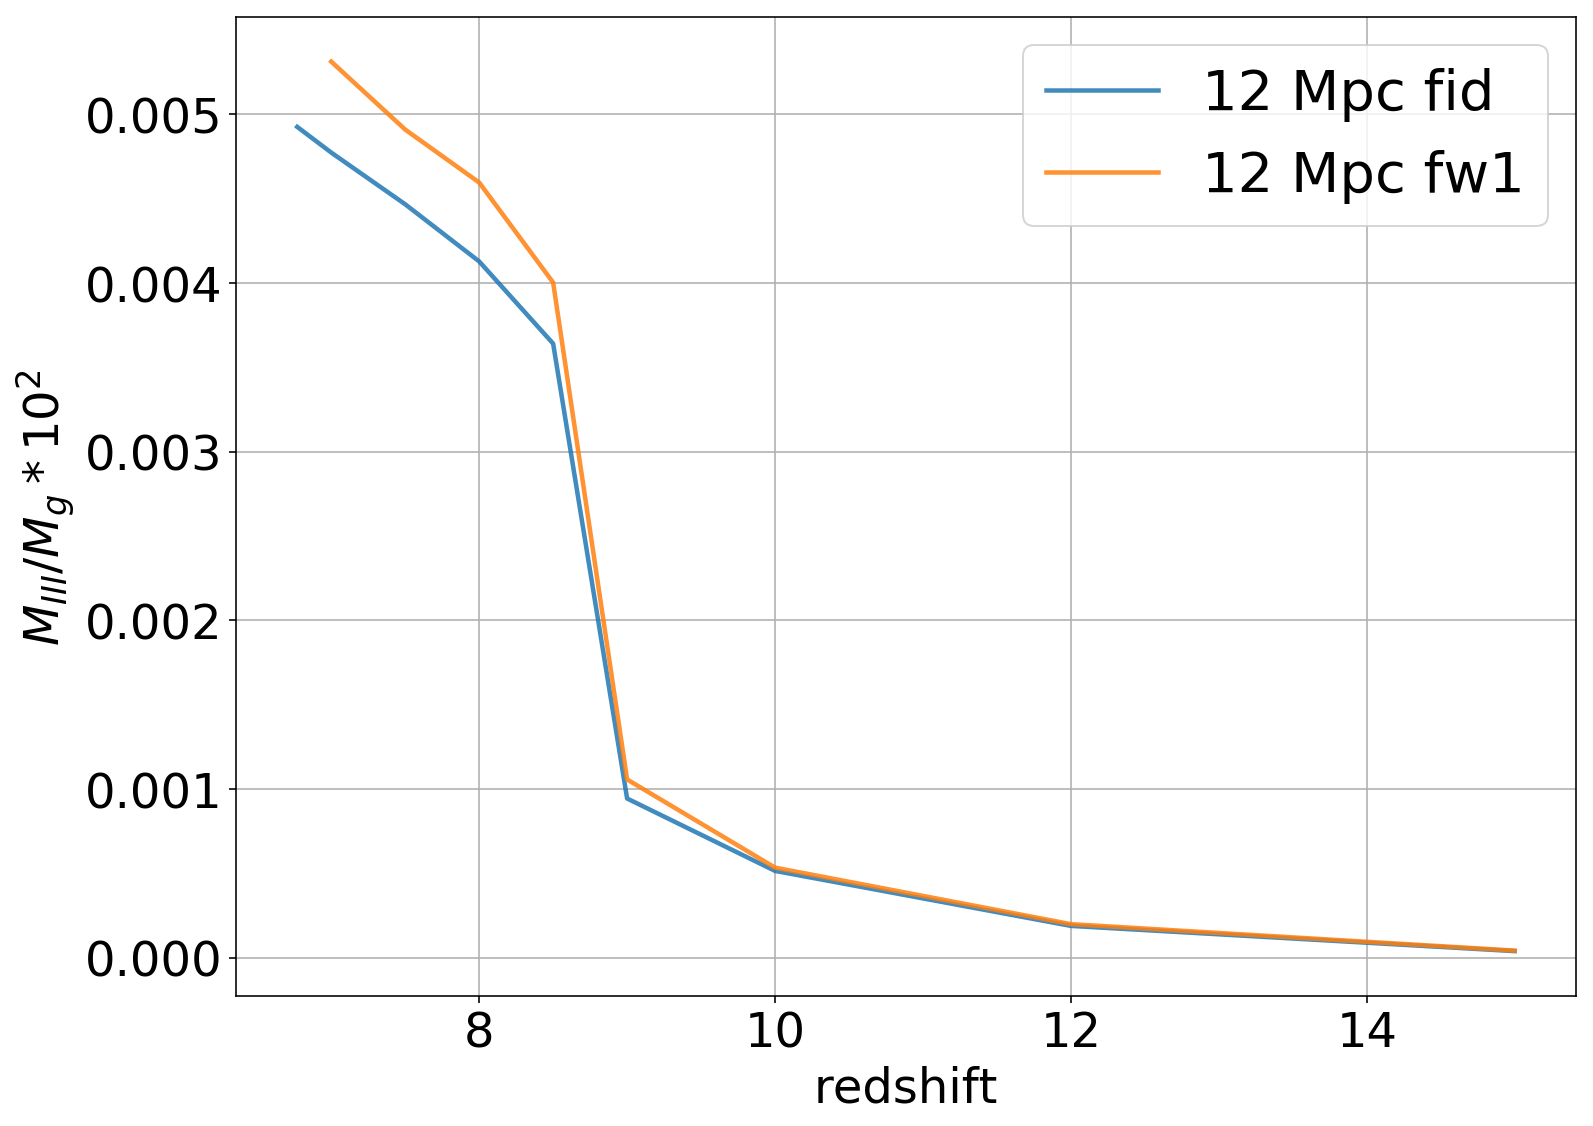

In [13]:
fig, ax = plt.subplots(figsize=(12,9))

ax.plot(starData['z'],PopIII_mass/gas_mass, 'C0-', 
        linewidth = 2.25, alpha=0.85, label='12 Mpc fid')
ax.plot(starData_fw1['z'],PopIII_mass_fw1/gas_mass_fw1, 'C1-', 
        linewidth = 2.25, alpha=0.85, label='12 Mpc fw1')
# ax.plot(starData_3Mpc['z'],PopIII_mass_3Mpc/gas_mass_3Mpc, 'C2-', 
#         linewidth = 2.25, alpha=0.85, label='3 Mpc fid')
ax.set_xlabel('redshift')
ax.set_ylabel('$M_{III}/M_g * 10^{2}$')
ax.grid(True)
ax.yaxis.set_major_formatter(divfmt)
ax.legend()
plt.savefig("PopIII_gas_frac.pdf",dpi=fig.dpi,bbox_inches='tight')

# Look at halo gas fractions

Use data from the 100 largest halos to plot the mass of gas that is or has been in Pop III stars.<br>

Note that for this analysis I have stored the virial mass of the halo along with the gas and Pop III processed mass. The latter are for $2 r_v$

In [14]:
halos_p3sn_2 = np.genfromtxt('p3sn/AllHaloGas_r_2.0_z7_p3sn.txt', delimiter=',',names=True)
halos_p3sn_1 = np.genfromtxt('p3sn/AllHaloGas_r_1.0_z7_p3sn.txt', delimiter=',',names=True)
halos_fid_1 = np.genfromtxt('fid/AllHaloGas_r_1.0_z7_fid.txt', delimiter=',',names=True)
halos_fid_2 = np.genfromtxt('fid/AllHaloGas_r_2.0_z7_fid.txt', delimiter=',',names=True)

halos_fid_1.dtype.names

('M_h', 'r_vkpc', 'radkpc', 'M_g', 'M_P3g', 'ave_Z_g', 'ave_ZP_g')

In [18]:
halos_p3sn_1['M_h'].min(), halos_p3sn_1['M_h'].max()

(3137000.0, 1748000000.0)

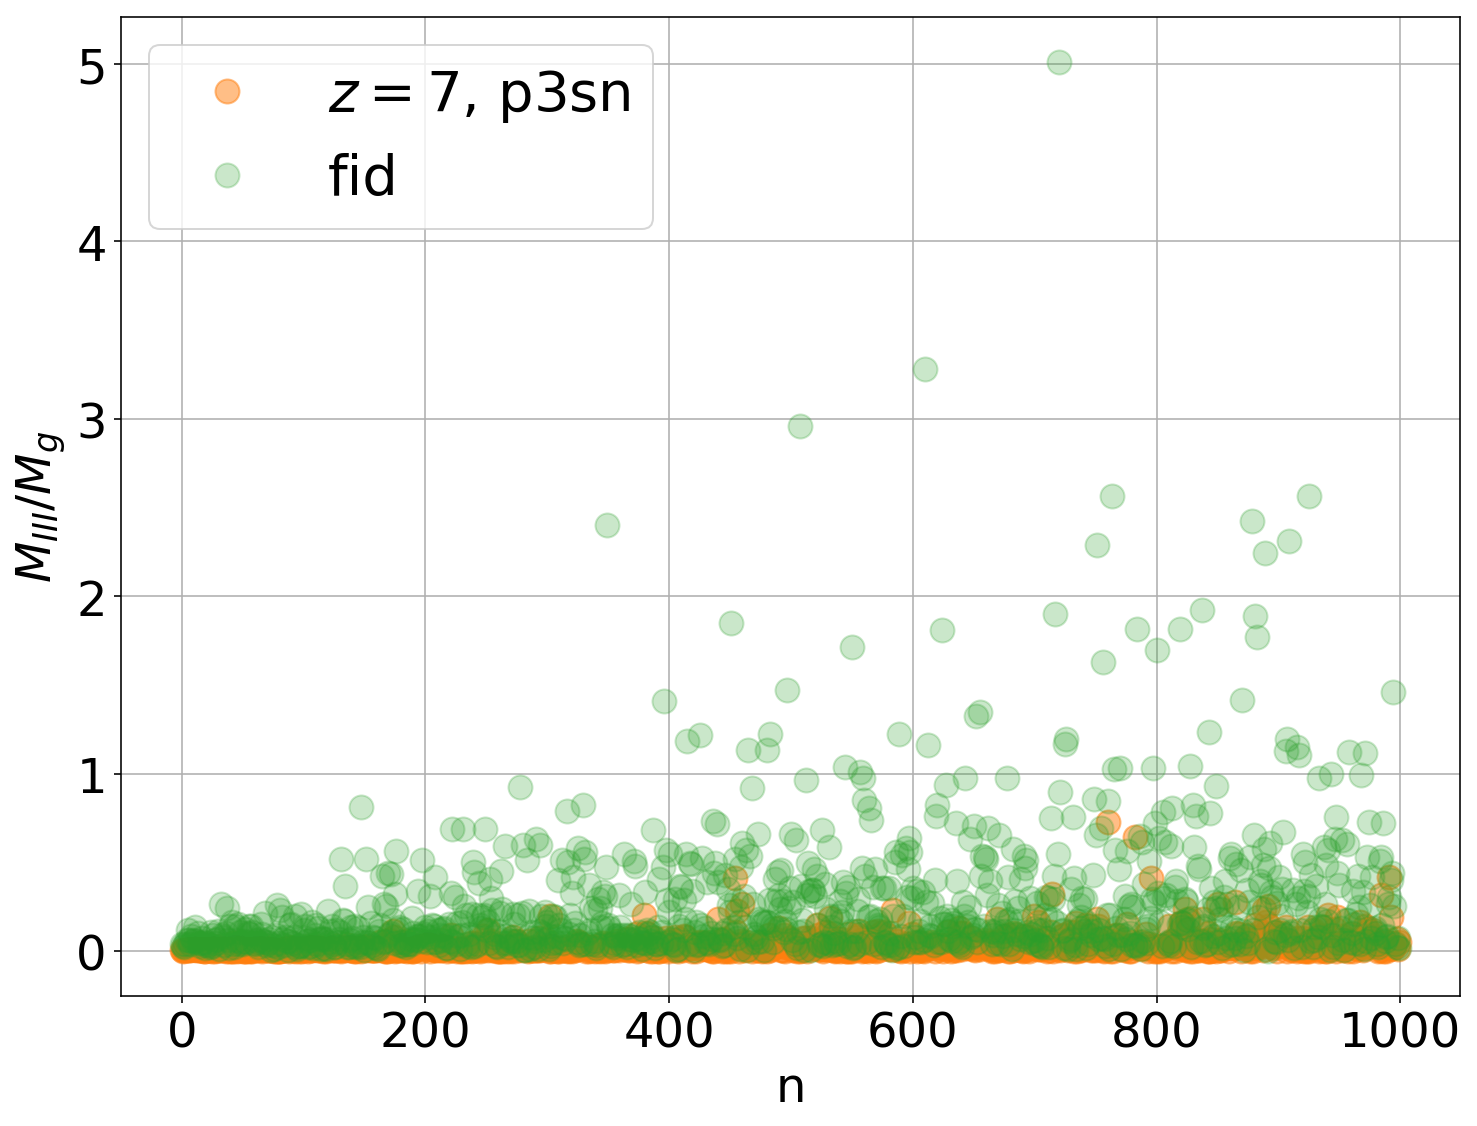

In [23]:
fig, ax = plt.subplots(figsize=(12,9))

ax.plot( halos_p3sn_1['M_P3g']/halos_p3sn_1['M_g'], 'C1o', ms=12, alpha=0.5, label="$z=${}, p3sn".format(7) )
ax.plot( halos_fid_1['M_P3g']/halos_fid_1['M_g'], 'C2o', ms=12, alpha=0.25, label="fid".format(7) )

ax.set_xscale('linear')
ax.set_ylabel('$M_{III}/M_g$')
ax.set_xlabel('$M_{h}$')
ax.set_xlabel('n')
ax.grid(True)
# ax.xaxis.set_major_formatter(divfmt)
ax.legend()
plt.savefig("PopIII_gas_frac.pdf",dpi=fig.dpi,bbox_inches='tight')

1.0
0.9999999999999999
1.0


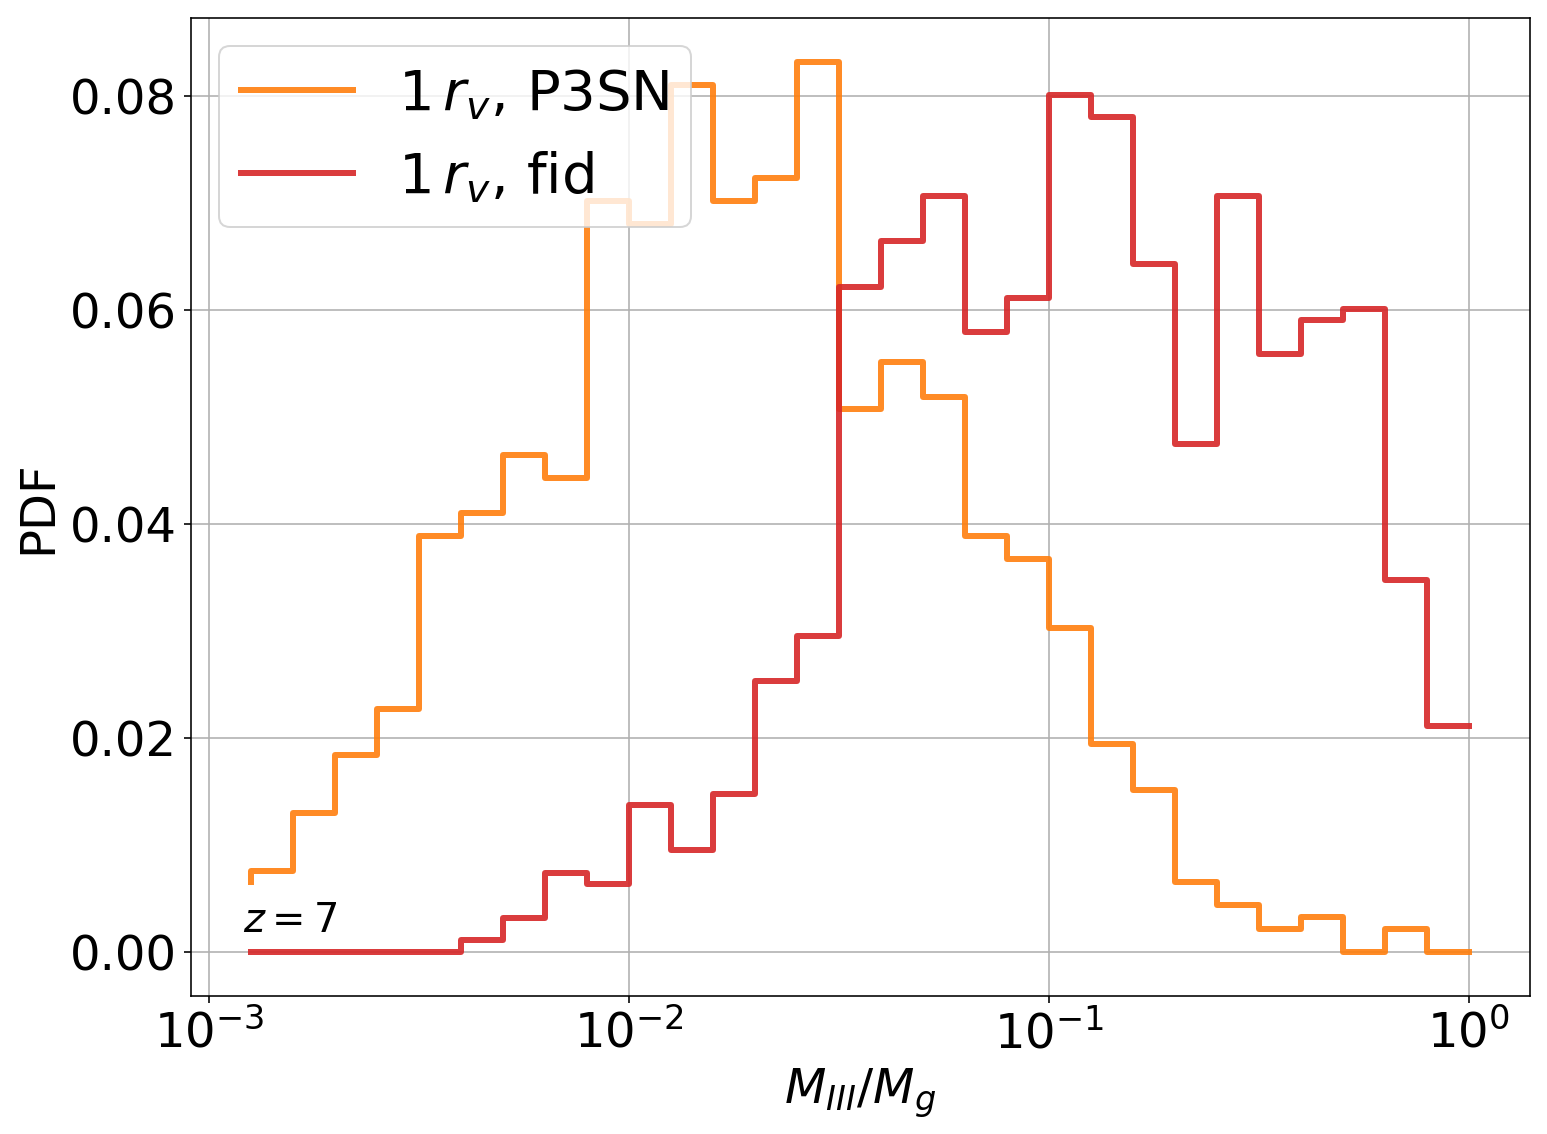

In [81]:
fig, ax = plt.subplots(figsize=(12,9))

thebins = np.logspace(-3,0,31)
p1n, bins = np.histogram(halos_p3sn_1['M_P3g']/halos_p3sn_1['M_g'], 
                       bins=thebins, density=False)
p1n = p1n/p1n.sum()

p2n, bins = np.histogram(halos_p3sn_2['M_P3g']/halos_p3sn_2['M_g'], 
                       bins=thebins, density=False)
p2n = p2n/p2n.sum()

f1n, bins = np.histogram(halos_fid_1['M_P3g']/halos_fid_1['M_g'], 
                       bins=thebins, density=False)
f1n = f1n/f1n.sum()

f2n, bins = np.histogram(halos_fid_2['M_P3g']/halos_fid_2['M_g'], 
                       bins=thebins, density=False)
f2n = f2n/f2n.sum()


ax.plot(thebins[1:], p1n, drawstyle='steps', lw=3.0, ls='-', color='C1', alpha=0.9, label="$1\, r_v$, P3SN" )
# ax.plot(thebins[1:], p2n, drawstyle='steps', lw=3.0, ls=':', color='C2', alpha=0.9, label="$2\, r_v$, P3SN" )
ax.plot(thebins[1:], f1n, drawstyle='steps', lw=3.0, ls='-', color='C3', alpha=0.9, label="$1\, r_v$, fid" )
# ax.plot(thebins[1:], f2n, drawstyle='steps', lw=3.0, ls=':', color='C4', alpha=0.9, label="$2\, r_v$, fid" )


print(p1n.sum())
print(f1n.sum())
print(f2n.sum())
ax.set_xscale('log')
ax.set_xlabel('$M_{III}/M_g$')
ax.set_ylabel('PDF')
ax.grid(True)
ax.tick_params(axis=u'both', which=u'minor',length=0)
# ax.xaxis.set_major_formatter(divfmt)
ax.legend()
ax.annotate(r'$z=7$', xy = (1e-4,0), xytext = (1.2e-3,0.001), xycoords='figure fraction',
            textcoords = 'data', ha = 'left', va = 'bottom',fontsize=20)
plt.savefig("PopIII_halogas_frac_hist.pdf",dpi=fig.dpi,bbox_inches='tight')

1.0


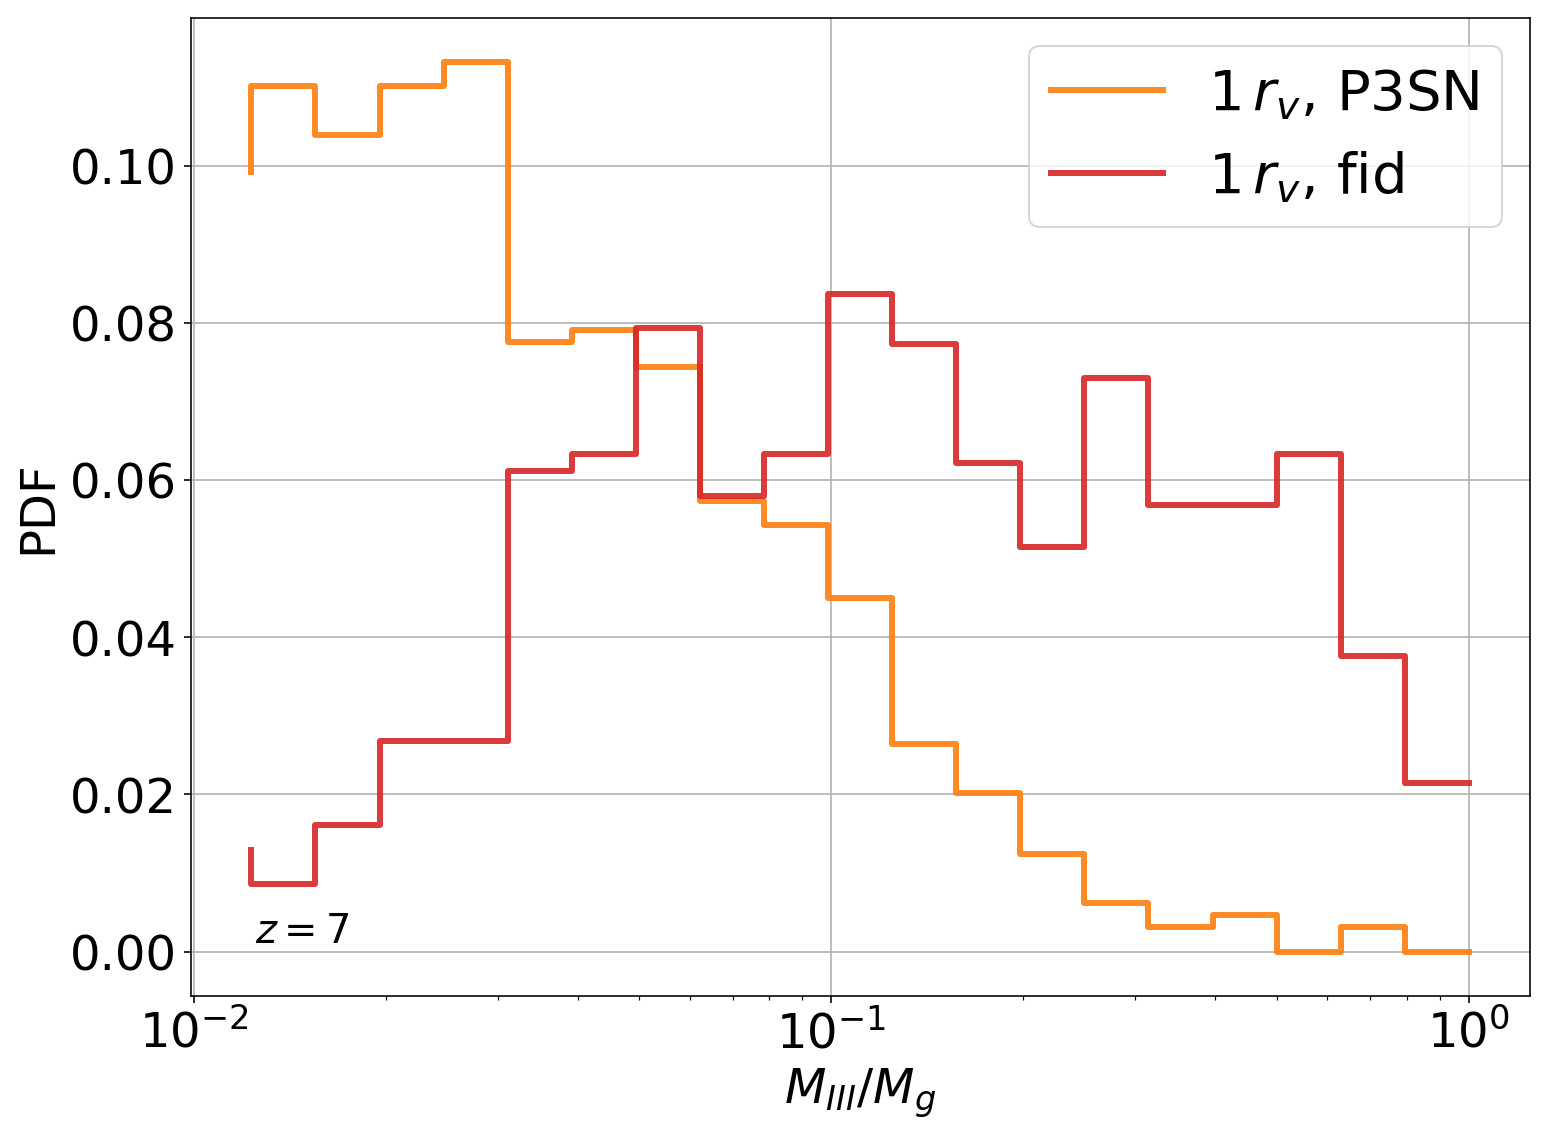

In [30]:
fig, ax = plt.subplots(figsize=(12,9))

thebins = np.logspace(-2.01,0,21)
p1n, bins = np.histogram(halos_p3sn_1['M_P3g']/halos_p3sn_1['M_g'], 
                       bins=thebins, density=False)
p1n = p1n/p1n.sum()

p2n, bins = np.histogram(halos_p3sn_2['M_P3g']/halos_p3sn_2['M_g'], 
                       bins=thebins, density=False)
p2n = p2n/p2n.sum()

f1n, bins = np.histogram(halos_fid_1['M_P3g']/halos_fid_1['M_g'], 
                       bins=thebins, density=False)
f1n = f1n/f1n.sum()

f2n, bins = np.histogram(halos_fid_2['M_P3g']/halos_fid_2['M_g'], 
                       bins=thebins, density=False)
f2n = f2n/f2n.sum()


ax.plot(thebins[1:], p1n, drawstyle='steps', lw=3.0, ls='-', color='C1', alpha=0.9, label="$1\, r_v$, P3SN" )
# ax.plot(thebins[1:], p2n, drawstyle='steps', lw=3.0, ls=':', color='C2', alpha=0.9, label="$2\, r_v$, P3SN" )
ax.plot(thebins[1:], f1n, drawstyle='steps', lw=3.0, ls='-', color='C3', alpha=0.9, label="$1\, r_v$, fid" )
# ax.plot(thebins[1:], f2n, drawstyle='steps', lw=3.0, ls=':', color='C4', alpha=0.9, label="$2\, r_v$, fid" )


print(p1n.sum())
ax.set_xscale('log')
ax.set_xlabel([1e-2,1e-1,1e0])
ax.set_xlabel('$M_{III}/M_g$')
ax.set_ylabel('PDF')
ax.grid(True)
# ax.xaxis.set_major_formatter(divfmt)
ax.legend()
ax.annotate(r'$z=7$', xy = (1e-4,0), xytext = (1.25e-2,0.0), xycoords='figure fraction',
            textcoords = 'data', ha = 'left', va = 'bottom',fontsize=20)
plt.savefig("PopIII_halogas_frac_hist_zoom.pdf",dpi=fig.dpi,bbox_inches='tight')

/Users/earnric/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log10


Largest bin value: 0.000, smallest -2.0644579892269186


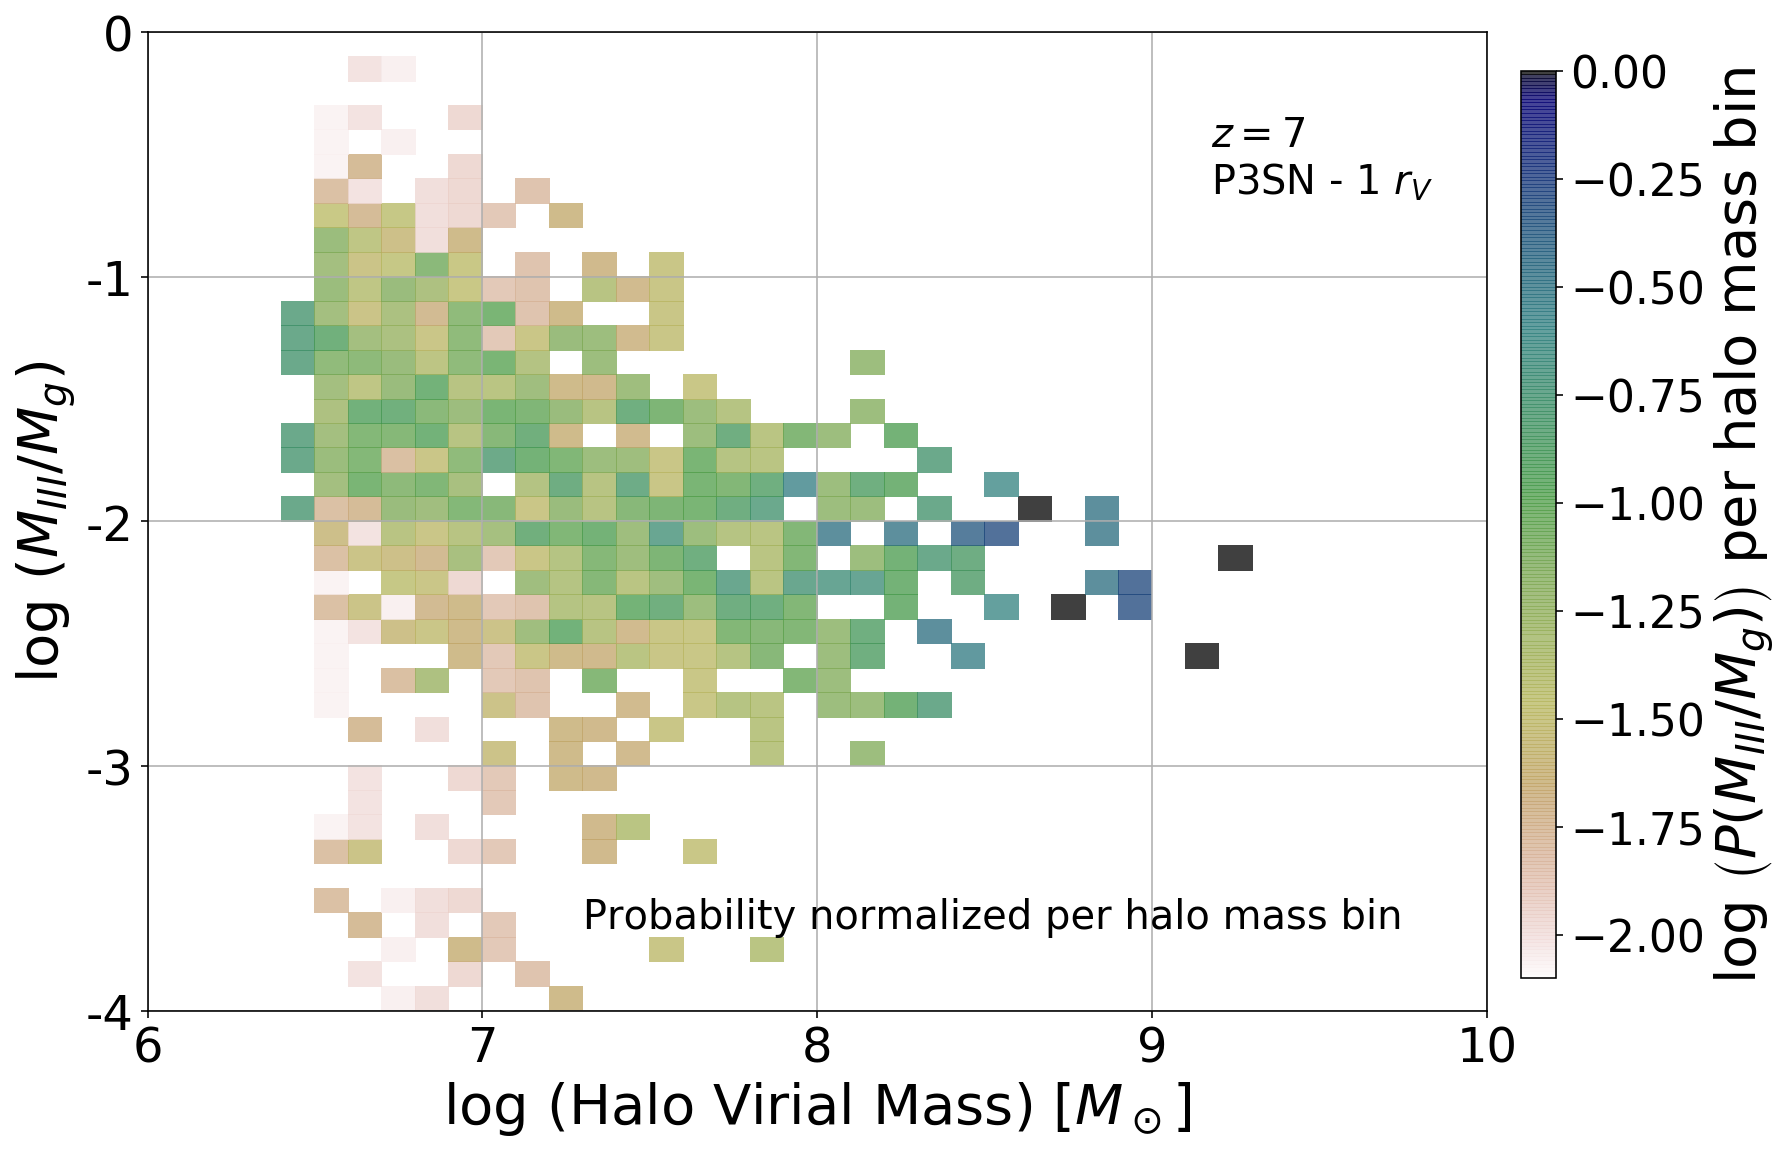

In [37]:
fig, ax = plt.subplots(figsize=(12,9))

fraction_bins  = np.logspace(-4,0,41)
halo_mass_bins = np.logspace(6,10,41)

n, binsx, binsy = np.histogram2d(halos_p3sn_1['M_P3g']/halos_p3sn_1['M_g'],
                                 halos_p3sn_1['M_h'],
                                 bins=[fraction_bins,halo_mass_bins],normed=False)

X, Y = np.meshgrid(halo_mass_bins, fraction_bins)  # Create a grid over the range of bins for the plot

# Mask out 0 values before taking log10... 
H = np.ma.masked_where(n==0.0, n)
for i in range(len(H[0,:])):     # Column index i, over len of row 0
    colTot = np.sum(H[:,i])
    for j in range(len(H[:,0])): # Row index j, over len of column 0
        H[:,i][j] = H[:,i][j]/colTot
#     print(np.sum(H[:,i]))
H = np.log10(H)        # Take log of counts, we've already normalized by volume and area
print("Largest bin value: {:.3f}, smallest {}".format(H.max(),H.min()))
# Create the plot
im = (ax.pcolormesh(X, Y, H, cmap=mpl.cm.gist_earth_r, vmin=-2.1, vmax=0, alpha=0.75) )
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
cbar = fig.colorbar(im, cax=cbar_ax)

cbar.ax.tick_params(labelsize=22) 
#cbar.ax.set_yticklabels(['1', '2', '4', '6', '10', maxCV], size=24)
cbar.set_label(r"log $\left(P(M_{III}/M_g)\right)$ per halo mass bin",fontsize=28)

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_ylabel('log ($M_{III}/M_g$)',fontsize=28)
ax.set_xlabel('log (Halo Virial Mass) [$M_\odot$]',fontsize=28)
ax.grid(True)
ax.tick_params(axis=u'both', which=u'minor',length=0)

ax.xaxis.set_major_formatter(log_formatter)
ax.yaxis.set_major_formatter(log_formatter)

ax.annotate(r'Probability normalized per halo mass bin', xy = (3e8,1e-4), xytext = (2e7,2e-4), xycoords='figure fraction',
            textcoords = 'data', ha = 'left', va = 'bottom',fontsize=20)
ax.annotate('$z=7$\nP3SN - 1 $r_V$', xy = (1e7,1e-4), xytext = (1.5e9,2e-1), xycoords='figure fraction',
            textcoords = 'data', ha = 'left', va = 'bottom',fontsize=20)

# ax.legend()
plt.savefig("PopIII_rv1_halogas_frac_halomass_hist.pdf",dpi=fig.dpi,bbox_inches='tight')

/Users/earnric/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log10


Largest bin value: 0.000, smallest -2.1367205671564067


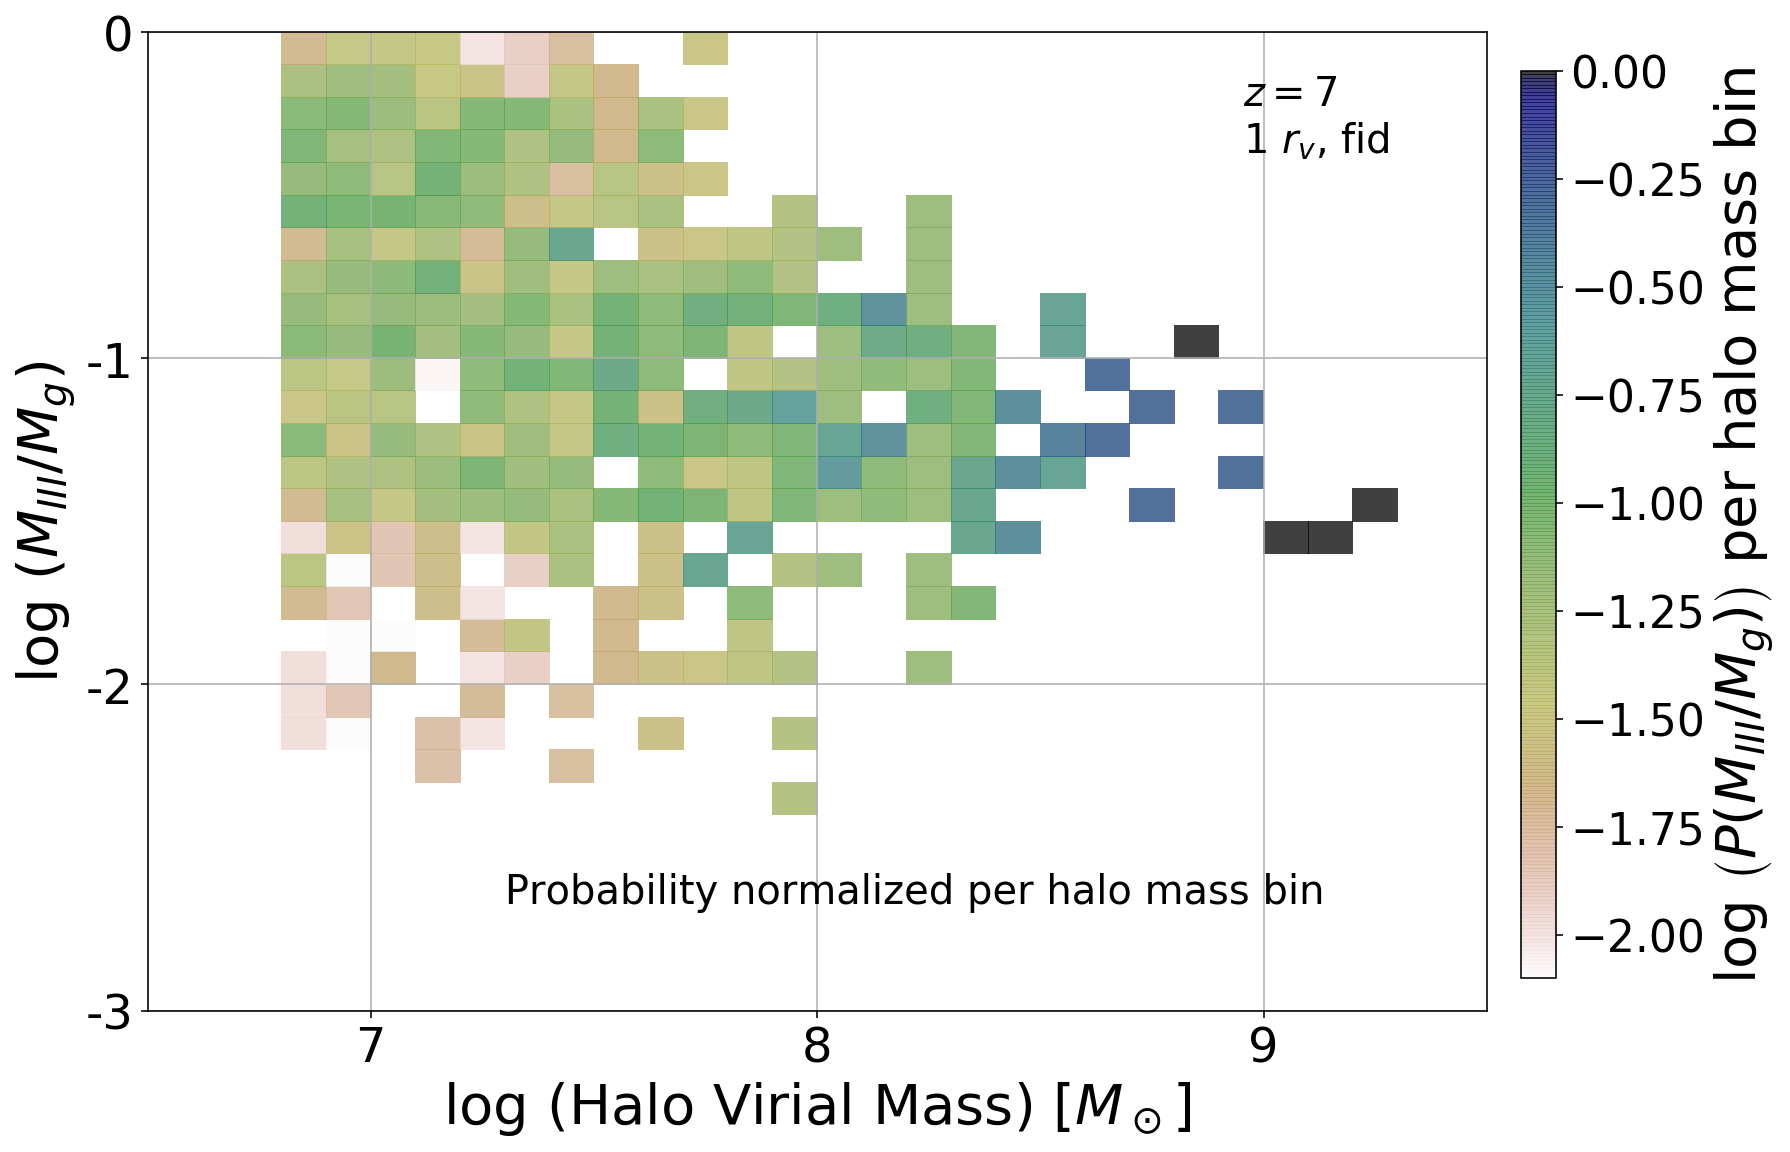

In [41]:
fig, ax = plt.subplots(figsize=(12,9))

fraction_bins  = np.logspace(-3,0,31)
halo_mass_bins = np.logspace(6.5,9.5,31)

n, binsx, binsy = np.histogram2d(halos_fid_1['M_P3g']/halos_fid_1['M_g'],
                                 halos_fid_1['M_h'],
                                 bins=[fraction_bins,halo_mass_bins],normed=False)

X, Y = np.meshgrid(halo_mass_bins, fraction_bins)  # Create a grid over the range of bins for the plot

# Mask out 0 values before taking log10... 
H = np.ma.masked_where(n==0.0, n)
for i in range(len(H[0,:])):     # Column index i, over len of row 0
    colTot = np.sum(H[:,i])
    for j in range(len(H[:,0])): # Row index j, over len of column 0
        H[:,i][j] = H[:,i][j]/colTot
#     print(np.sum(H[:,i]))
H = np.log10(H)        # Take log of counts, we've already normalized by volume and area
print("Largest bin value: {:.3f}, smallest {}".format(H.max(),H.min()))
# Create the plot
im = (ax.pcolormesh(X, Y, H, cmap=mpl.cm.gist_earth_r, vmin=-2.1, vmax=0, alpha=0.75) )
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
cbar = fig.colorbar(im, cax=cbar_ax)

cbar.ax.tick_params(labelsize=22) 
#cbar.ax.set_yticklabels(['1', '2', '4', '6', '10', maxCV], size=24)
cbar.set_label(r"log $\left(P(M_{III}/M_g)\right)$ per halo mass bin",fontsize=28)



ax.set_xscale('log')
ax.set_yscale('log')

ax.set_ylabel('log ($M_{III}/M_g$)',fontsize=28)
ax.set_xlabel('log (Halo Virial Mass) [$M_\odot$]',fontsize=28)
ax.grid(True)
ax.tick_params(axis=u'both', which=u'minor',length=0)

ax.xaxis.set_major_formatter(log_formatter)
ax.yaxis.set_major_formatter(log_formatter)

ax.annotate(r'Probability normalized per halo mass bin', xy = (3e8,1e-3), xytext = (2e7,2e-3), xycoords='figure fraction',
            textcoords = 'data', ha = 'left', va = 'bottom',fontsize=20)
ax.annotate('$z=7$\n1 $r_v$, fid', xy = (1e7,1e-4), xytext = (9.0e8,4e-1), xycoords='figure fraction',
            textcoords = 'data', ha = 'left', va = 'bottom',fontsize=20)

# ax.legend()
plt.savefig("PopIII_halogas_frac_halomass_hist_fid1.pdf",dpi=fig.dpi,bbox_inches='tight')

/Users/earnric/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log10
/Users/earnric/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in log10
/Users/earnric/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


Largest bin value: 0.000, smallest -2.1367205671564067
Largest bin value: 0.000, smallest -2.0453229787866576


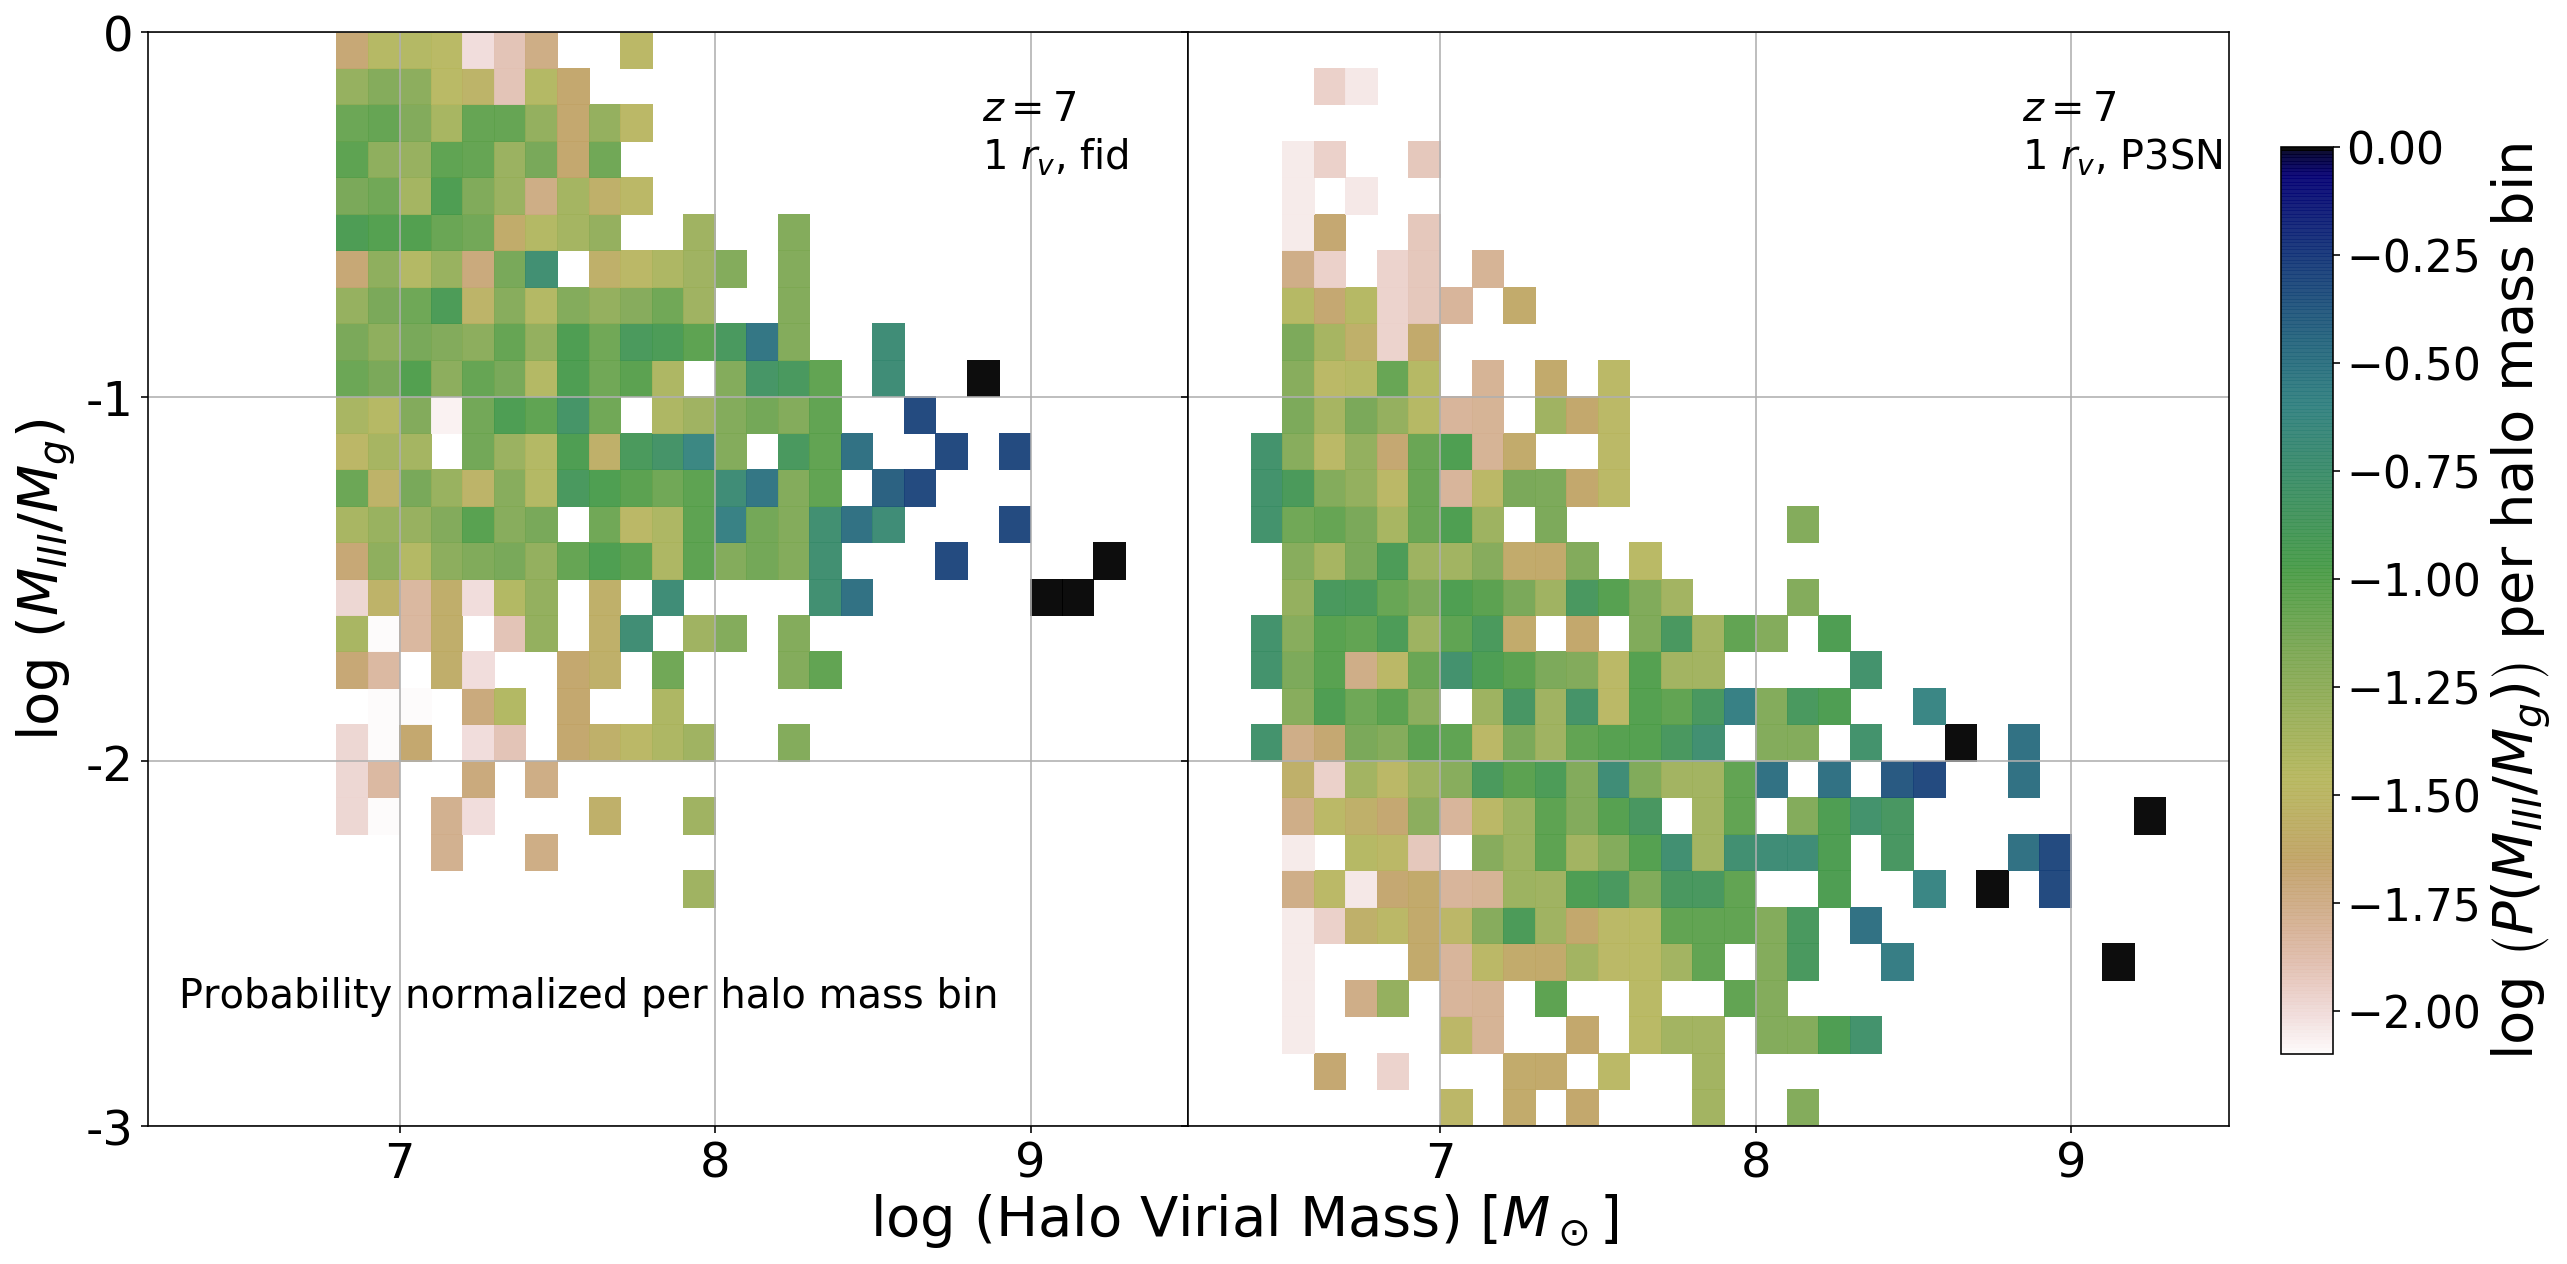

In [78]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(18,9))

fraction_bins  = np.logspace(-3,0,31)
halo_mass_bins = np.logspace(6.2,9.5,34)

n, binsx, binsy = np.histogram2d(halos_fid_1['M_P3g']/halos_fid_1['M_g'],
                                 halos_fid_1['M_h'],
                                 bins=[fraction_bins,halo_mass_bins],normed=False)

X, Y = np.meshgrid(halo_mass_bins, fraction_bins)  # Create a grid over the range of bins for the plot

# Mask out 0 values before taking log10... 
H = np.ma.masked_where(n==0.0, n)
for i in range(len(H[0,:])):     # Column index i, over len of row 0
    colTot = np.sum(H[:,i])
    for j in range(len(H[:,0])): # Row index j, over len of column 0
        H[:,i][j] = H[:,i][j]/colTot
#     print(np.sum(H[:,i]))
H = np.log10(H)        # Take log of counts, we've already normalized by volume and area
print("Largest bin value: {:.3f}, smallest {}".format(H.max(),H.min()))
# Create the plot
im = (ax[0].pcolormesh(X, Y, H, cmap=mpl.cm.gist_earth_r, vmin=-2.1, vmax=0, alpha=0.95) )



np3, binsx, binsy = np.histogram2d(halos_p3sn_1['M_P3g']/halos_p3sn_1['M_g'],
                                 halos_p3sn_1['M_h'],
                                 bins=[fraction_bins,halo_mass_bins],normed=False)

X, Y = np.meshgrid(halo_mass_bins, fraction_bins)  # Create a grid over the range of bins for the plot

# Mask out 0 values before taking log10... 
Hp3 = np.ma.masked_where(np3==0.0, np3)
for i in range(len(Hp3[0,:])):     # Column index i, over len of row 0
    colTot = np.sum(Hp3[:,i])
    for j in range(len(Hp3[:,0])): # Row index j, over len of column 0
        Hp3[:,i][j] = Hp3[:,i][j]/colTot
#     print(np.sum(H[:,i]))
Hp3 = np.log10(Hp3)        # Take log of counts, we've already normalized by volume and area
print("Largest bin value: {:.3f}, smallest {}".format(Hp3.max(),Hp3.min()))
# Create the plot
imp3 = (ax[1].pcolormesh(X, Y, Hp3, cmap=mpl.cm.gist_earth_r, vmin=-2.1, vmax=0, alpha=0.95, hatch='//') )

ax[0].set_ylabel('log ($M_{III}/M_g$)',fontsize=28)
for a in ax:
    a.set_xscale('log')
    a.set_yscale('log')

    a.grid(True)
    a.tick_params(axis=u'both', which=u'minor',length=0)
    a.xaxis.set_major_formatter(log_formatter)
    a.yaxis.set_major_formatter(log_formatter)

plt.setp([a.get_yticklabels() for a in fig.axes[1:]], visible=False)

cbar_ax = fig.add_axes([0.9, 0.15, 0.02, 0.7])
cbar = fig.colorbar(im, cax=cbar_ax)

cbar.ax.tick_params(labelsize=22) 
#cbar.ax.set_yticklabels(['1', '2', '4', '6', '10', maxCV], size=24)
cbar.set_label(r"log $\left(P(M_{III}/M_g)\right)$ per halo mass bin",fontsize=28)

ax[0].annotate(r'Probability normalized per halo mass bin', xy = (3e8,1e-3), xytext = (2e6,2e-3), xycoords='figure fraction',
            textcoords = 'data', ha = 'left', va = 'bottom',fontsize=20)
ax[0].annotate('$z=7$\n1 $r_v$, fid', xy = (1e7,1e-4), xytext = (7.0e8,4e-1), xycoords='figure fraction',
            textcoords = 'data', ha = 'left', va = 'bottom',fontsize=20)
ax[1].annotate('$z=7$\n1 $r_v$, P3SN', xy = (1e7,1e-4), xytext = (7.0e8,4e-1), xycoords='figure fraction',
            textcoords = 'data', ha = 'left', va = 'bottom',fontsize=20)
fig.text(0.5, 0.01, 'log (Halo Virial Mass) [$M_\odot$]',fontsize=28, ha='center')
fig.tight_layout() 
# ax.legend()

fig.subplots_adjust(right=0.88, wspace=0.0)
plt.savefig("PopIII_halogas_frac_halomass_hist_fid1-p3sn1.pdf",dpi=fig.dpi,bbox_inches='tight')